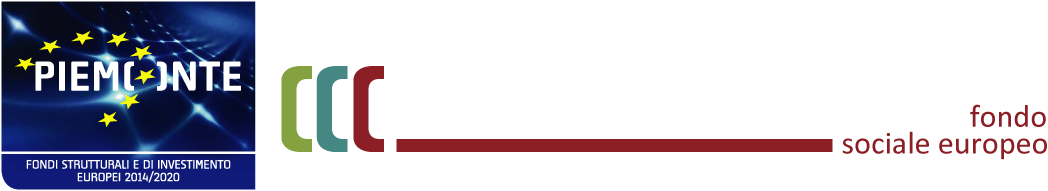





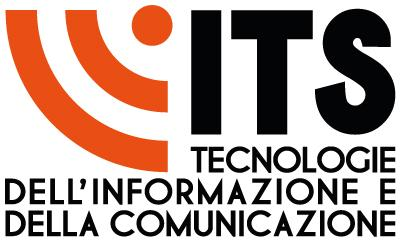




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


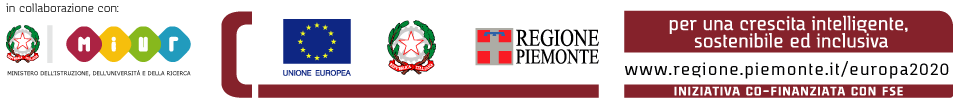



---



NOME:

\

COGNOME:



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **QUALORA DUE O PIÙ PROVE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE, SARANNO TUTT VALUTATE CON IL VOTO MINIMO.**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```

\

* **I dati devono obbligatoriamente essere caricati dall' url fornito su questo documento. Il caricamento dal drive locale dello studente verrà valutato negativamente.**

\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**
- Raccolta dati medici sulle condizioni di salute e lo stile di vita legate alle malattie cardovascolari

\

**url:**
- https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv

\


**fonte:**

- https://www.kaggle.com/

\

**traduzione dati:**
* *age*: età espressa in giorni
* *sex*:
  1. donne
  2. uomini
* *height*: altezza espressa in cm
* *weight*: peso espresso in kg
* *ap_hi*: pressione massima
* *ap_lo*: pressione minima
* *cholesterol*:
  1. normale
  2. sopra il normale
  3. ben al di sopra del normale
* *gluc*:  
  1. normale,
  2. sopra il normale
  3. ben al di sopra del normale
* *smoke*:
  1. si
  2. no
* *alco*:
  1. si
  2. no
* *active* (attività fisica)
  1. si
  2. no
* *cardio* (persenza di malattie cardiovascolari)
  1. si
  2. no

  









---



# **RICHIESTA 1**

Setup del progetto.

- Importare le librerie necessarie allo svolgimento del progetto
- Oraganizzare e preparare i dati

In [22]:
# Per prima cosa, importo le librerie necessarie allo svolgimento del progetto.
# In particolar modo aggiungo le seguenti librerie:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importo il csv dentro una variabile e creo una copia dell'intero dataframe importato in modo tale da non dover sovrascrivere i dati nel modello originale (oltre ad avere una copia del df originale come eventuale backup)
df_med = pd.read_csv ('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv', sep = ',' ,encoding = 'latin1')
df_med_copia = df_med.copy()
display(df_med_copia)

 # Constatato il fatto che ha colonna 'age' ha i valori espressi in giorni, ho optato per convertire i record in anni
df_med_copia['age'] = df_med_copia['age'] // 365

# Per ogni singola colonna del dataframe ho creato una variabile che contenga tutti i valori. Il motivo: un piu' agevole accesso ai dati per le future operazioni
df_eta = df_med_copia['age']
df_sesso = df_med_copia['sex']
df_altezza = df_med_copia['height']
df_peso = df_med_copia['weight']
df_ap_hi = df_med_copia['ap_hi']
df_ap_lo = df_med_copia['ap_lo']
df_colesterolo = df_med_copia['cholesterol']
df_gluc = df_med_copia['gluc']
df_fumatori = df_med_copia['smoke']
df_alcol = df_med_copia['alco']
df_attivita = df_med_copia['active']
df_cvd = df_med_copia['cardio']

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# **RICHIESTA 2**

- Può essere utile  modificare il DataFrame riordinandolo sulla base dei dati di una colonna?

- Verificare la presenza di valori nulli e decidere come trattarli.

- Verificare la persenza di *outlier* e decidere come trattarli.


In [14]:
 # CONSIDERAZIONI SUL DATAFRAME #
 # La colonna 'id' nelle successive analisi non mi sembrava particolarmente significativo, cosi' ho optato per eliderlo dal dataframe
  ## cancellata la colonna id ##
#df_med_copia = df_med_copia.drop('id', axis=1)

 ## ordinato il dataframe per eta secondo un ordine crescente ##
df_med_copia = df_med_copia.sort_values('age', ascending = True)
#display(df_med_copia)

# Esaminando i valori del df, mi sono imbattuto in dati fuori scala, pertanto ho deciso di identificarli basando la mia scelta sulla tabella presente nella Richiesta 6 #

 # ridefinizione dei valori outlier per la pressione sistolica
limite_max_ap_hi = 221
limite_min_ap_hi = 70
df_med_copia = df_med_copia[(df_med_copia['ap_hi'] <= limite_max_ap_hi) & (df_med_copia['ap_hi'] >= limite_min_ap_hi)]
#display(df_ap_hi)

# ridefinizione dei valori outlier per la pressione diastolica
 # Sebbene si tratti comunque di valori estremamente bassi, ho deciso di includere (come limite minimo), anche i pazienti che avessero una pressione diastolica >= 40. Infatti dalle ricerche effettuate, questo valore (sebbene al di sotto della norma) sembra essere verosimile
limite_max_ap_lo = 181
limite_min_ap_lo = 40
df_med_copia = df_med_copia[(df_med_copia['ap_lo'] <= limite_max_ap_lo) & (df_med_copia['ap_lo'] >= limite_min_ap_lo)]
#display(df_ap_lo)

 ## Avendo dei valori outliner, ho deciso di eliminare quelle righe dal dataframe con i valori NaN evidenziati dai limiti precedentemente definiti ##
df_med_copia = df_med_copia.dropna()

# Come nel blocco di codice precedente, ho utilizzato un approccio che si basa sul conservare le vecchie versioni del dataframe e, di conseguenza, ho optato per creare una nuova versione del dataframe con i valori aggiornati

df_med_copia_2 = df_med_copia

df_eta = df_med_copia_2['age']
df_sesso = df_med_copia_2['sex']
df_altezza = df_med_copia_2['height']
df_peso = df_med_copia_2['weight']
df_ap_hi = df_med_copia_2['ap_hi']
df_ap_lo = df_med_copia_2['ap_lo']
df_colesterolo = df_med_copia_2['cholesterol']
df_gluc = df_med_copia_2['gluc']
df_fumatori = df_med_copia_2['smoke']
df_alcol = df_med_copia_2['alco']
df_attivita = df_med_copia_2['active']
df_cvd = df_med_copia_2['cardio']
display(df_med_copia_2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30666,43842,29,1,159,59.0,120,80,1,1,0,0,1,0
6219,8850,29,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,29,2,175,92.0,100,60,1,1,0,0,1,0
55905,79749,30,1,160,59.0,110,70,1,1,0,0,1,0
43242,61766,39,1,162,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57805,82491,64,2,164,68.0,120,80,1,1,0,0,1,0
54745,78109,64,2,163,65.0,120,80,1,1,0,0,1,1
50508,72087,64,2,174,72.0,180,100,3,1,0,0,0,1
10694,15288,64,1,171,120.0,150,100,2,2,0,0,0,1


# **RICHIESTA 3**

A partire dai dati sul fumo e sul consumo di alcol, atturare la seguenti analisi e visualizzare i risultati.
 * Quant'è la percentuale tra le donne
 * Quant'è la percentuale tra gli uomini
 * Quant'è la percenutale in totale



3687

Percentuale fumatori tra le donne: 1.7777380739681972
Percentuale fumatori tra gli uomini: 21.92192192192192
Percentuale totale fumatori: 8.80124485551823
Percentuale consumatori di alcol tra le donne: 2.5415401107736284
Percentuale consumatori di alcol tra gli uomini: 10.631464798131466
Percentuale totale consumatori di alcol: 5.361895205270276


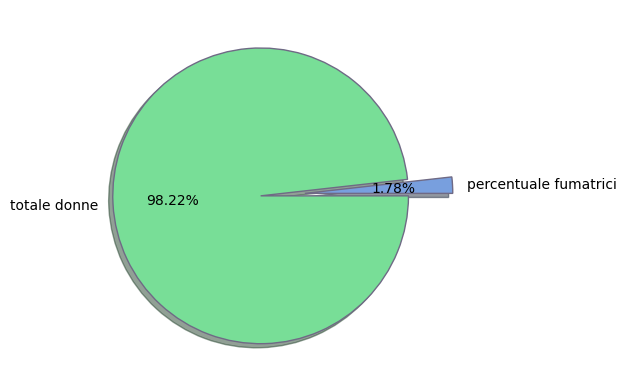

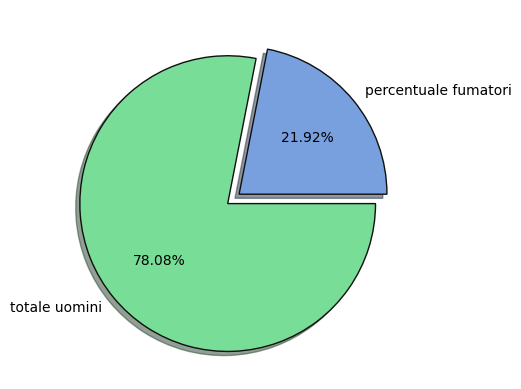

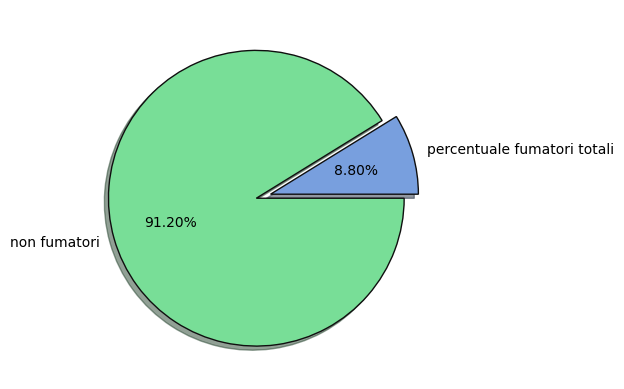

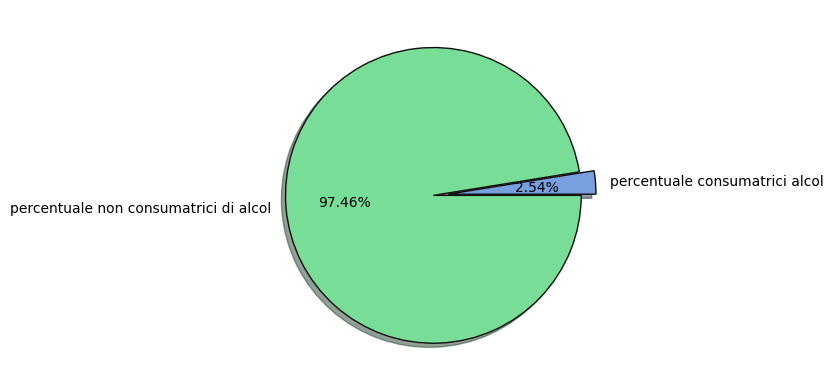

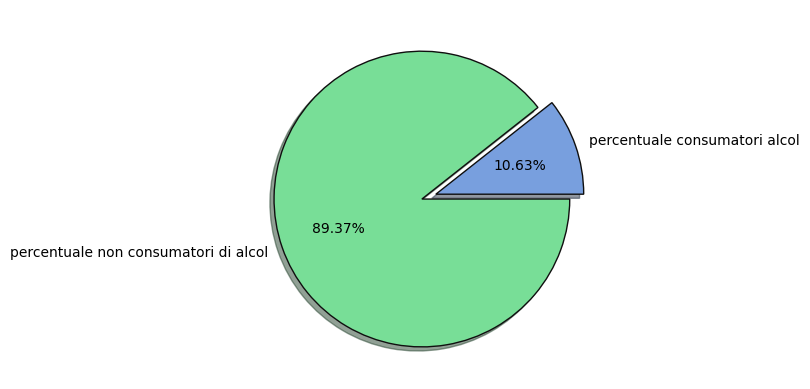

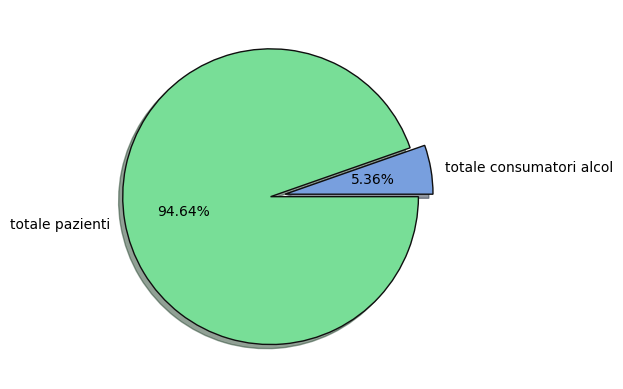

In [15]:
## Calcolo della percentuale dei fumatori ##

# Ho selezionato le righe del dataframe che corrispondono ai fumatori e le ho assegnate a df_fumatori; df_fumatori.shape[0] calcola il numero totale di fumatori nel dataframe e viene inserito nella variabile totale_fumatori
df_fumatori = df_med_copia_2[df_med_copia_2['smoke'] == 1]

# Di seguito ho inizializzato le variabili con il totale delle donne ed il totale degli uomini che mi serviranno per calcolare le percentuali in relazione al fumo
df_tot_donne = df_med_copia_2[df_med_copia_2['sex'] == 1].shape[0]
df_tot_uomini = df_med_copia_2[df_med_copia_2['sex'] == 2].shape[0]

totale_pazienti = 68763
totale_fumatori = df_fumatori.shape[0]

# Ho condotto l'analisi partendo dalle donne. Ho preso solo i dati che soddisfacessero la condizione sex == 1 e li ho sommati in un unico recordset.
# Una volta trovato il totale, ho semplicemente calcolato la percentuale di fumatrici sul totale dei pazienti donne
totale_fumatori_donne = df_fumatori[df_fumatori['sex'] == 1].shape[0]
percentuale_fumatori_donne = (totale_fumatori_donne / df_tot_donne) * 100

# Stessa tipologia di analisi anche per gli uomini (a parità di condizioni differenti - in questo caso: sex == 2)
totale_fumatori_uomini = df_fumatori[df_fumatori['sex'] == 2].shape[0]
percentuale_fumatori_uomini = (totale_fumatori_uomini / df_tot_uomini) * 100

# Per fornire un'analisi più approfondita, mi è sembrato opportuno valutare anche quanti fossero, in percentuale, i fumatori sull'intero campione dei pazienti
percentuale_tot_fumatori = (totale_fumatori / totale_pazienti) * 100

# Di seguito ho inizializzato le variabili con il totale delle donne ed il totale degli uomini che mi serviranno per calcolare le percentuali in relazione al consumo di alcol
df_alcol = df_med_copia_2[df_med_copia_2['alco'] == 1]
totale_alcol = df_alcol.shape[0]
display(totale_alcol)

# Calcolo la percentuale di donne consumatrici di alcol in relazione alla totale delle pazienti donne
totale_alcol_donne = df_alcol[df_alcol['sex'] == 1].shape[0]
percentuale_alcol_donne = (totale_alcol_donne / df_tot_donne) * 100

# Calcolo la percentuale di uomini consumatori di alcol in relazione al totale dei pazienti uomini
totale_alcol_uomini = df_alcol[df_alcol['sex'] == 2].shape[0]
percentuale_alcol_uomini = (totale_alcol_uomini / df_tot_uomini) * 100

# Calcolo la percentuale complessiva dei consumatori di alcol rapportati al totale dei pazienti
percentuale_tot_alcol = (totale_alcol / totale_pazienti) * 100

# Visualizzazione dei risultati
print("Percentuale fumatori tra le donne:", percentuale_fumatori_donne)
print("Percentuale fumatori tra gli uomini:", percentuale_fumatori_uomini)
print("Percentuale totale fumatori:", percentuale_tot_fumatori)

print("Percentuale consumatori di alcol tra le donne:", percentuale_alcol_donne)
print("Percentuale consumatori di alcol tra gli uomini:", percentuale_alcol_uomini)
print("Percentuale totale consumatori di alcol:", percentuale_tot_alcol)


# Grafico per fumatrici
sezioni_fumatori_donne = np.array([percentuale_fumatori_donne, 100 - percentuale_fumatori_donne])
etichette_fumatori_donne = np.array(['percentuale fumatrici', 'totale donne'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([  0.1,  0.2, ])
bordi = {"linewidth": 1,  "edgecolor":"#6f6a85"}

plt.pie(sezioni_fumatori_donne,
        labels = etichette_fumatori_donne,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)

plt.show()


# grafico per percentuale fumatori uomini
sezioni_fumatori_uomini = np.array([percentuale_fumatori_uomini, 100 - percentuale_fumatori_uomini])
etichette_fumatori_uomini = np.array(['percentuale fumatori', 'totale uomini'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_fumatori_uomini,
        labels = etichette_fumatori_uomini,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# Grafico che visualiza il rapporto tra fumatori e numero totale dei pazienti
sezioni_fumatori_tot = np.array([percentuale_tot_fumatori, 100 - percentuale_tot_fumatori])
etichette_fumatori_tot = np.array(['percentuale fumatori totali', 'non fumatori'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_fumatori_tot,
        labels = etichette_fumatori_tot,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# Grafico che visualizza il rapporto tra donne consumatrici di alcol e donne non consumatrici di alcol
sezioni_alcol_donne = np.array([percentuale_alcol_donne, 100 - percentuale_alcol_donne])
etichette_alcol_donne = np.array(['percentuale consumatrici alcol', 'percentuale non consumatrici di alcol'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_alcol_donne,
        labels = etichette_alcol_donne,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# Grafico che visualizza la percentuale degli uomini consumatori di alcol in rapporto ai non consumatori di alcol
sezioni_alcol_uomini = np.array([percentuale_alcol_uomini, 100 - percentuale_alcol_uomini])
etichette_alcol_uomini = np.array(['percentuale consumatori alcol', 'percentuale non consumatori di alcol'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_alcol_uomini,
        labels = etichette_alcol_uomini,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# Grafico che visualizza il totale dei consumatori di alcol in relazioni ai pazienti totali
sezioni_alcol_tot = np.array([percentuale_tot_alcol, 100 - percentuale_tot_alcol])
etichette_alcol_tot = np.array(['totale consumatori alcol', 'totale pazienti'])
colori = np.array(['#789fde',"#78de97",])
offsets = np.array([0. , 0.1])
bordi = {"linewidth": 1,  "edgecolor":"#0f0f0f"}

plt.pie(sezioni_alcol_tot,
        labels = etichette_alcol_tot,
        explode = offsets,
        autopct = '%2.2f%%',
        shadow = True,
        wedgeprops = bordi,
        colors = colori)
plt.show()

# **RICHIESTA 4**


La pressione arteriosa in un individuo si calcola mettendo a rapporto la pressione sistolica (massima) con la pressione diastolica (minima).

\begin{align}
  ap = {  {ap\_hi} \over {ap\_lo}}
\end{align}

* Calcolare la pressione per ogni individuo del dataset e aggiungere la nuova colonna dopo  ap_lo.

* Verificare che il processo non generi anomalie.



*N.B Da qui in poi per "pressione", si intndernno i volri riferiti alla nuova colonna "ap"*



In [16]:
# ho inserito nel dataframe su cui lavoro la colonna 'ap', trovata attraverso il metodo get_loc e passando come parametro il nome della tabella a seguito della quale verra' istanziata 'ap'
# ap e' stata ottenuta usando la formual sopracitata
df_med_copia_2.insert(df_med_copia.columns.get_loc('ap_lo') + 1, 'ap', df_med_copia['ap_hi'] / df_med_copia['ap_lo'])

display(df_med_copia_2)

,id,age,sex,height,weight,ap_hi,ap_lo,ap,cholesterol,gluc,smoke,alco,active,cardio
30666,43842,29,1,159,59.0,120,80,1.500000,1,1,0,0,1,0
6219,8850,29,1,175,59.0,120,80,1.500000,1,1,0,0,1,0
22343,31922,29,2,175,92.0,100,60,1.666667,1,1,0,0,1,0
55905,79749,30,1,160,59.0,110,70,1.571429,1,1,0,0,1,0
43242,61766,39,1,162,62.0,120,80,1.500000,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57805,82491,64,2,164,68.0,120,80,1.500000,1,1,0,0,1,0
54745,78109,64,2,163,65.0,120,80,1.500000,1,1,0,0,1,1
50508,72087,64,2,174,72.0,180,100,1.800000,3,1,0,0,0,1
10694,15288,64,1,171,120.0,150,100,1.500000,2,2,0,0,0,1


# **RICHIESTA 5**

**5.1 media**
* Qual'è la pressione media tra i fumatori e i non fumatori?
* Qual'è la pressione media tra chi consuma e chi non cosuma alcol?

In [17]:
# Pressione media tra i fumatori:
# Ho usato il metodo .mean() per calcolare la media dei fumatori ('smoke' == 1), prendendo come riferimento per la pressione la tabella 'ap' appena creata
pressione_media_fumatori = df_med_copia_2[df_med_copia_2['smoke'] == 1]['ap'].mean()

# Pressione media tra i non fumatori:
# Ho usato la stessa metodologia anche per i non fumatori
pressione_media_non_fumatori = df_med_copia_2[df_med_copia_2['smoke'] == 0]['ap'].mean()

print("Pressione media tra i fumatori:", pressione_media_fumatori)
print("Pressione media tra i non fumatori:", pressione_media_non_fumatori)

# Stesso discorso vale per la media dei consumatori...
pressione_media_consumatori_alcol = df_med_copia_2[df_med_copia_2['alco'] == 1]['ap'].mean()

# ...E dei non consumatori di alcol
pressione_media_non_consumatori_alcol = df_med_copia_2[df_med_copia_2['alco'] == 0]['ap'].mean()

print("Pressione media tra chi consuma alcol:", pressione_media_consumatori_alcol)
print("Pressione media tra chi non consuma alcol:", pressione_media_non_consumatori_alcol)



Pressione media tra i fumatori: 1.563950375063607
Pressione media tra i non fumatori: 1.5604708091461965
Pressione media tra chi consuma alcol: 1.558456714764235
Pressione media tra chi non consuma alcol: 1.5609085173476605


**5.2 varianza**
* Come varia la pressione nei i fumatori?
* Come varia la pressione nei i consumatori di alcol?


In [18]:
# Varianza della pressione nei fumatori:
# anche in questo caso ho utilizzato il metodo di numpy per calcolare piu' agilmente la varianza sulla pressione dei fumatori e dei consumatori di alcol
varianza_fumatori = np.var(df_med_copia_2[df_med_copia_2['smoke'] == 1]['ap'])

# Varianza della pressione nei consumatori di alcol
varianza_consumatori_alcol = np.var(df_med_copia_2[df_med_copia_2['alco'] == 1]['ap'])

print("Varianza della pressione nei fumatori:", varianza_fumatori)
print("Varianza della pressione nei consumatori di alcol:", varianza_consumatori_alcol)

Varianza della pressione nei fumatori: 0.024312420470403096
Varianza della pressione nei consumatori di alcol: 0.028415063439450546


**5.3 deviazione standard**
* Com'*italicized text* è distribuito il dato della pressione nei fumatori
* Com' è distribuito il dato della pressione nei "bevitori"


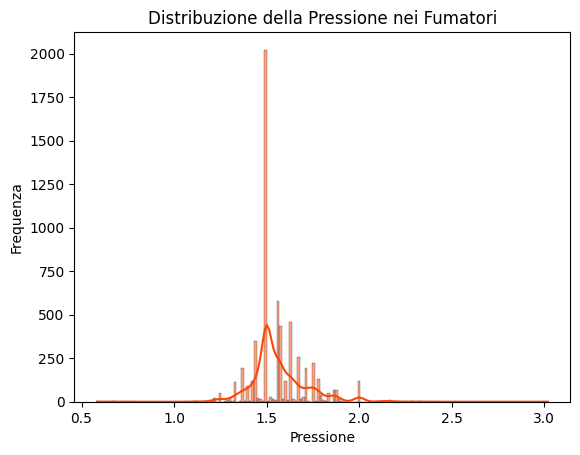

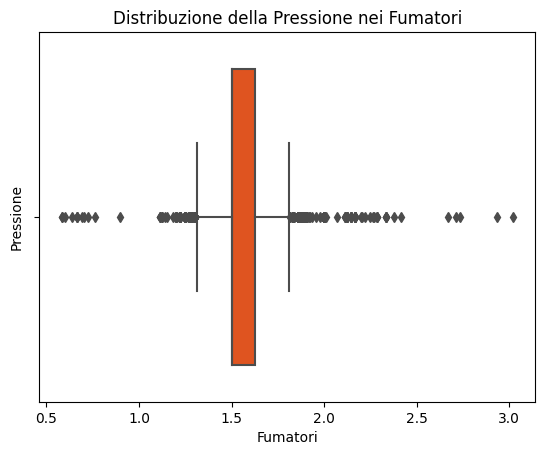

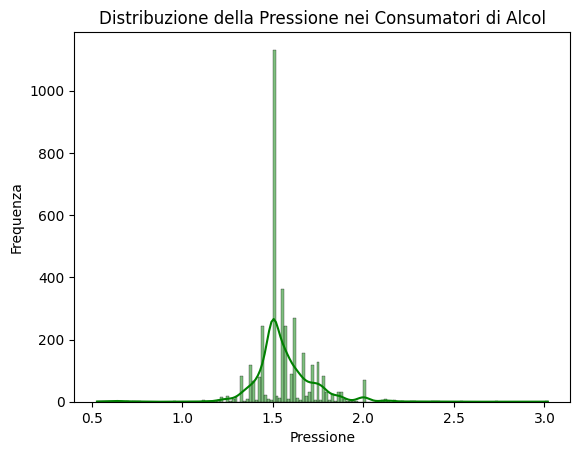

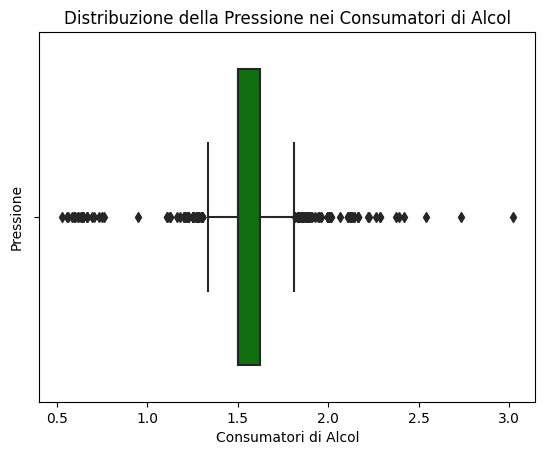

In [19]:
# Distribuzione del dato della pressione nei fumatori
# per la visualizzazione dei dati ho deciso di importare la liberia seaborn

# Grafico che visualizza la distribuzione della pressione nei fumatori
sns.histplot(data=df_med_copia_2[df_med_copia_2['smoke'] == 1], x='ap', color='orangered', kde=True)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.title('Distribuzione della Pressione nei Fumatori')
plt.show()

# Grafico che visualizza la distribuzione della
sns.boxplot(data=df_med_copia_2[df_med_copia_2['smoke'] == 1], x='ap', color='orangered')
plt.xlabel('Fumatori')
plt.ylabel('Pressione')
plt.title('Distribuzione della Pressione nei Fumatori')
plt.show()

# Distribuzione del dato della pressione nei consumatori di alcol
sns.histplot(data=df_med_copia_2[df_med_copia_2['alco'] == 1], x='ap', color='green', kde=True)
plt.xlabel('Pressione')
plt.ylabel('Frequenza')
plt.title('Distribuzione della Pressione nei Consumatori di Alcol')
plt.show()

sns.boxplot(data=df_med_copia_2[df_med_copia_2['alco'] == 1], x='ap', color='green')
plt.xlabel('Consumatori di Alcol')
plt.ylabel('Pressione')
plt.title('Distribuzione della Pressione nei Consumatori di Alcol')
plt.show()

**5.4 correlazione**
 * Rapportare la pressione dei fumatori e dei "bevitori.
 * Verificare il grado di correlazione
 * Visualizzare il risultato in una matrice di correlazione.


-0.026358702282627915
[[ 1.         -0.02642446]
 [-0.02642446  1.        ]]


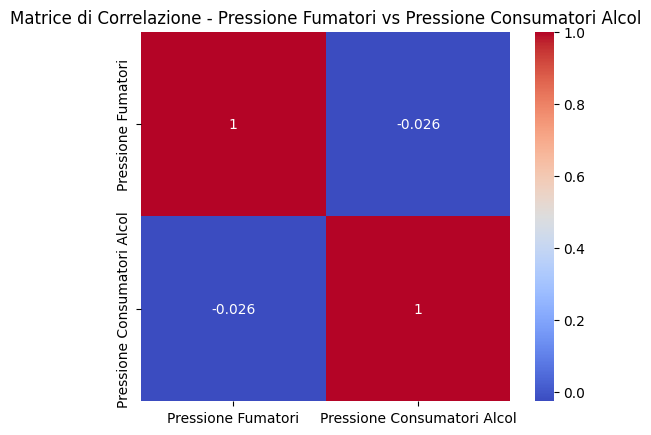

In [20]:
def correlazione(x: np.array, mu_x: float, y: np.array, mu_y: float) -> float:
    cov = np.sum((x - mu_x) * (y - mu_y))
    return (cov / np.sqrt(np.sum(np.power(x - mu_x, 2)) * np.sum(np.power(y - mu_y, 2))))

df_fumatori = df_med_copia_2[df_med_copia_2['smoke'] == 1]
df_consumatori_alcol = df_med_copia_2[df_med_copia_2['alco'] == 1]

pressione_fumatori = df_fumatori['ap'].to_numpy()
pressione_consumatori_alcol = df_consumatori_alcol['ap'].to_numpy()

# Calcola la media delle pressioni dei fumatori e dei consumatori di alcol
mu_fumatori = pressione_fumatori.mean()
mu_consumatori_alcol = pressione_consumatori_alcol.mean()

# Dopo essermi scontrato con un errore circa la differenza di lunghezza degli array, ho deciso di ridurre le dimensioni dell'array per renderle uguali
min_dim = min(len(pressione_fumatori), len(pressione_consumatori_alcol))
pressione_fumatori = pressione_fumatori[:min_dim]
pressione_consumatori_alcol = pressione_consumatori_alcol[:min_dim]

# Definisco le correlazioni che mi serviranno per la visualizzazione con la heatmap
corr_1 = correlazione(pressione_fumatori, mu_fumatori, pressione_consumatori_alcol, mu_consumatori_alcol)
print(corr_1)

corr_2 = np.corrcoef(pressione_fumatori, pressione_consumatori_alcol)
print(corr_2)

df_correlazione = pd.DataFrame({'Pressione Fumatori': pressione_fumatori, 'Pressione Consumatori Alcol': pressione_consumatori_alcol})

correlazione = df_correlazione.corr()

# Visualizzo di dati attraverso una heatmap
sns.heatmap(correlazione, annot=True, cmap='coolwarm', square=True)
plt.title('Matrice di Correlazione - Pressione Fumatori vs Pressione Consumatori Alcol')
plt.show()



# **RICHIESTA 6**

* Visualizzare la distribuzione dei valori della pressione di fumatori e consumatori di alcol con le rispettive mededie.


* Visualizzare la distrubuzione dei valori della pressione di fumatori e cosumatori di alcol ed evidenziare i valori critici rispetto alla seguete tabella (ricordarsi di valutare il rapporto sistolica / diastolica).

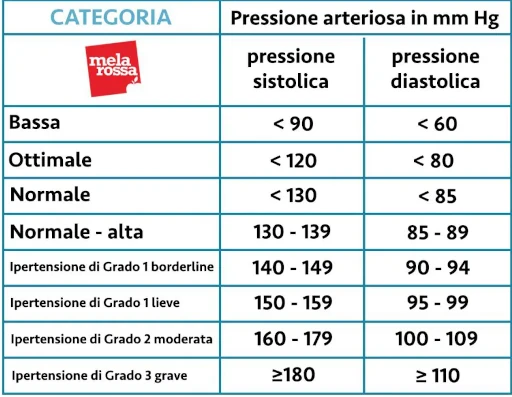

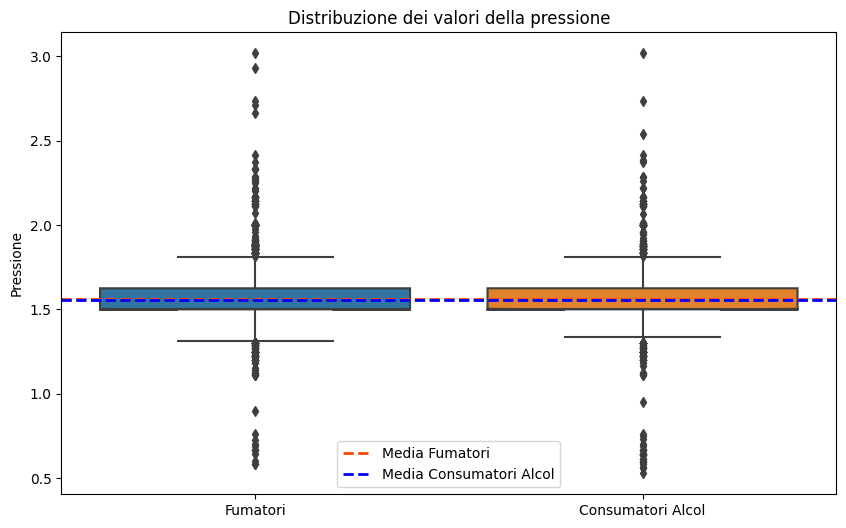

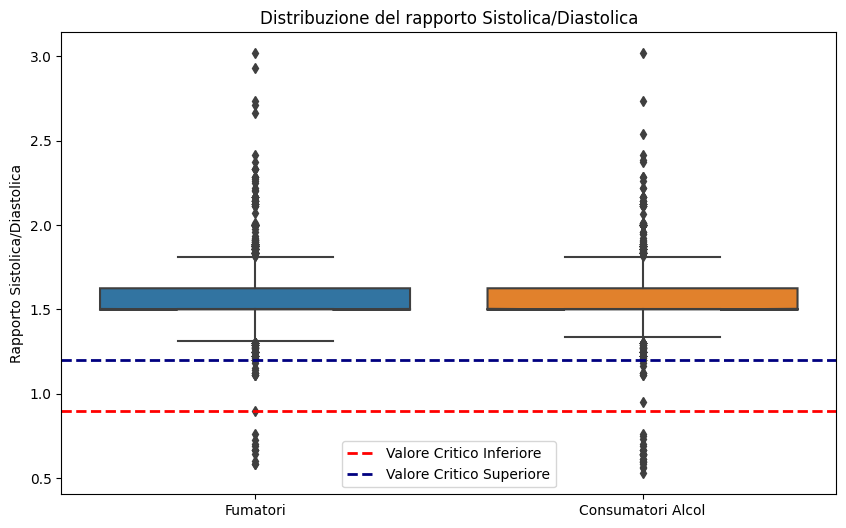

In [21]:
# Richiamo le variabili che mi servono per effettuare le analisi
df_fumatori = df_med_copia_2[df_med_copia_2['smoke'] == 1]
df_consumatori_alcol = df_med_copia_2[df_med_copia_2['alco'] == 1]

# Riprendo le variabili che contengono le medie
media_fumatori = df_fumatori['ap'].mean()
media_consumatori_alcol = df_consumatori_alcol['ap'].mean()

# Visualizzo i dati in un grafico a boxplot per la distribuzione dei valori della pressione
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_fumatori['ap'], df_consumatori_alcol['ap']], notch=True)
plt.xticks([0, 1], ['Fumatori', 'Consumatori Alcol'])
plt.ylabel('Pressione')
plt.title('Distribuzione dei valori della pressione')
plt.axhline(media_fumatori, color='orangered', linestyle='--', linewidth=2, label='Media Fumatori')
plt.axhline(media_consumatori_alcol, color='blue', linestyle='--', linewidth=2, label='Media Consumatori Alcol')
plt.legend()
plt.show()

# Calcolo il rapporto sistolica/diastolica per fumatori e consumatori di alcol
rapporto_fumatori = df_fumatori['ap_hi'] / df_fumatori['ap_lo']
rapporto_consumatori_alcol = df_consumatori_alcol['ap_hi'] / df_consumatori_alcol['ap_lo']

# Definisco i valori critici del rapporto sistolica/diastolica per mezzo della formula utilizzata prima per la pressione arteriosa
valore_critico_inferiore = 0.9
valore_critico_superiore = 1.2

# Creo il grafico per la visualizzazione dei dati riguardo la distribuzione del rapporto sistolica/diastolica
plt.figure(figsize=(10, 6))
sns.boxplot(data=[rapporto_fumatori, rapporto_consumatori_alcol], notch=True)
plt.xticks([0, 1], ['Fumatori', 'Consumatori Alcol'])
plt.ylabel('Rapporto Sistolica/Diastolica')
plt.title('Distribuzione del rapporto Sistolica/Diastolica')
plt.axhline(valore_critico_inferiore, color='red', linestyle='--', linewidth=2, label='Valore Critico Inferiore')
plt.axhline(valore_critico_superiore, color='navy', linestyle='--', linewidth=2, label='Valore Critico Superiore')
plt.legend()
plt.show()